# Trying to model ignition delay from RMG for Iso-octane



In [1]:
import sys
sys.path.append('/scratch/ajulu.c/anaconda3/envs/rmg_py3')

In [2]:
!which python
!conda list rmg_py3

/scratch/ajulu.c/anaconda3/envs/rmg_py3/bin/python
# packages in environment at /scratch/ajulu.c/anaconda3/envs/rmg_py3:
#
# Name                    Version                   Build  Channel


In [3]:
import cantera as ct
import numpy as np
%matplotlib inline

from matplotlib import pyplot as plt

print("The cantera version runnning is {}". format(ct.__version__))

The cantera version runnning is 2.4.0


In [4]:
# cat /scratch/ajulu.c/Code/GTL/ic8/ic8_lowT/chemkin/chem_annotated.inp

In [7]:
from cantera import ck2cti
ck2cti.main([
    '--input=/home/ajulu.c/Code/GTL/ic8/chemkin/chem_annotated.inp',
    '--tran=/home/ajulu.c/Code/GTL/ic8/chemkin/tran.dat',
    '--output=/home/ajulu.c/Code/GTL/ic8/chemkin/chem_annotated.cti',
    '--permissive'])

Wrote CTI mechanism file to '/home/ajulu.c/Code/GTL/ic8/chemkin/chem_annotated.cti'.
Mechanism contains 375 species and 9181 reactions.
Validating mechanism...

**** WARNING ****
For species HOCHO(60), discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  -40.3604
	Value computed using high-temperature polynomial: -38.1678
PASSED.


In [5]:
gas = ct.Solution('/scratch/ajulu.c/Code/GTL/ic8/ic8_lowT/chemkin/chem_annotated.cti')



**** WARNING ****
For species HOCHO(164), discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  -40.3604
	Value computed using high-temperature polynomial: -38.1678


In [6]:
sorted(gas.species_names)

['Ar',
 'C(141)',
 'C2(158)',
 'C2H(4)',
 'C2H2(132)',
 'C2H3(129)',
 'C2H3O(128)',
 'C2H3O(157)',
 'C2H3O(163)',
 'C2H4(11)',
 'C2H4O(144)',
 'C2H4O(148)',
 'C2H4O(150)',
 'C2H5(140)',
 'C2H5O(145)',
 'C2H5O(149)',
 'C2H5O(161)',
 'C2H5O(193)',
 'C2H6(12)',
 'C2H6O(160)',
 'C2H6O(192)',
 'C2O(159)',
 'C3H3(182)',
 'C3H3O(189)',
 'C3H4(279)',
 'C3H4O(188)',
 'C3H5(208)',
 'C3H5(214)',
 'C3H5(215)',
 'C3H5O(184)',
 'C3H5O(191)',
 'C3H5O(501)',
 'C3H6(13)',
 'C3H6(852)',
 'C3H6O(183)',
 'C3H6O(190)',
 'C3H7O(292)',
 'C3H7O(293)',
 'C3H8(205)',
 'C4H2(223)',
 'C4H3(221)',
 'C4H4(226)',
 'C4H5(219)',
 'C4H5(220)',
 'C4H5(222)',
 'C4H5O(525)',
 'C4H6O(404)',
 'C4H6O(409)',
 'C4H7O(393)',
 'C4H7O(398)',
 'C4H8O(395)',
 'C4H8O(463)',
 'C4H9O(391)',
 'C5H11(774)',
 'C5H5(225)',
 'C5H6(224)',
 'C6H5(216)',
 'C6H6(217)',
 'C6H6(218)',
 'C7H14(793)',
 'C7H14(808)',
 'C7H14(826)',
 'C7H15(789)',
 'C7H15(790)',
 'C8H16(819)',
 'CC3H6(213)',
 'CH(3)',
 'CH2(130)',
 'CH2(135)',
 'CH2CO(131)',
 'CH2O(

In [7]:
for species in gas.species():
    if species.composition == {'C':8, 'H':18}:
        print(species.name)

iC8H18(1)


In [8]:
gas.TP = 900, 16e5
gas.set_equivalence_ratio(phi=1.0, fuel='iC8H18(1)', oxidizer='O2(2):0.2, N2:0.8' )
gas()


  gas:

       temperature             900  K
          pressure         1.6e+06  Pa
           density         6.44783  kg/m^3
  mean mol. weight         30.1557  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy       5.867e+05        1.769e+07     J
   internal energy      3.3856e+05        1.021e+07     J
           entropy          7224.9        2.179e+05     J/K
    Gibbs function     -5.9157e+06       -1.784e+08     J
 heat capacity c_p          1280.5        3.861e+04     J/K
 heat capacity c_v          1004.8         3.03e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                N2       0.787402         0.731465         -22.0668
         iC8H18(1)       0.015748         0.059654         -96.2481
             O2(2)        0.19685         0.208881          -25.138
     [ +485 minor]          

In [9]:
def set_gas_concentrations(gas, phi):
    """
    Set the concentrations in the gas according to the description
    in the paper by 
    """
    # Set it to desired stoichiometry with synthetic air (20% O2 : 80% N2)
    gas.set_equivalence_ratio(phi=1.0, fuel='iC8H18(1)', oxidizer='O2(2):0.2, N2:0.8' )
    # Then dilute the whole thing 1:2 with extra N2
    X = gas.X / 3.0 
    X[gas.species_index('N2')] += 2./3.
    gas.X = X

set_gas_concentrations(gas, 1.0)
gas()


  gas:

       temperature             900  K
          pressure     1.67954e+06  Pa
           density         6.44783  kg/m^3
  mean mol. weight         28.7276  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      6.2867e+05        1.806e+07     J
   internal energy      3.6819e+05        1.058e+07     J
           entropy          7220.2        2.074e+05     J/K
    Gibbs function     -5.8695e+06       -1.686e+08     J
 heat capacity c_p          1191.5        3.423e+04     J/K
 heat capacity c_v          902.12        2.592e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                N2       0.929134         0.906038         -21.8528
         iC8H18(1)     0.00524934        0.0208732         -97.2982
             O2(2)      0.0656168        0.0730886         -26.1881
     [ +485 minor]          

In [10]:
print("The number of reactions is {}".format(len(gas.reactions())))
print("The number of species is {}".format(len(gas.species())))

The number of reactions is 19250
The number of species is 488


In [11]:
# time in microseconds          relative pressure
pressure_profile = """0		                       1.000
50		                       1.004
250		                       1.027
450		                       1.046
650		                       1.062
850		                       1.072
1050	                       1.088
1250	                       1.101
1450	                       1.127
1650	                       1.157
1850	                       1.170
2050	                       1.160
2250	                       1.152
2450	                       1.153
2650	                       1.148
2850	                       1.143
3050	                       1.139
3250	                       1.136
3450	                       1.140
3650	                       1.142
3850	                       1.142
4050	                       1.153
4250	                       1.161
4450	                       1.168
4650	                       1.165
4850	                       1.166
5050	                       1.168
5250	                       1.170
5450	                       1.172
5650	                       1.175
5850	                       1.175
6050	                       1.178
6250	                       1.181
6450	                       1.184
6650	                       1.187
6850	                       1.189
7050	                       1.189
7250	                       1.188
7450	                       1.188
7650	                       1.190
7850	                       1.192
8000	                       1.192
10000	                       1.192
"""
times = []
pressures = []
for l in pressure_profile.splitlines():
    time, pressure = l.split()
    times.append((float(time)/1e6))
    pressures.append(float(pressure))
times = np.array(times)
pressures = np.array(pressures)
times, pressures

(array([0.00e+00, 5.00e-05, 2.50e-04, 4.50e-04, 6.50e-04, 8.50e-04,
        1.05e-03, 1.25e-03, 1.45e-03, 1.65e-03, 1.85e-03, 2.05e-03,
        2.25e-03, 2.45e-03, 2.65e-03, 2.85e-03, 3.05e-03, 3.25e-03,
        3.45e-03, 3.65e-03, 3.85e-03, 4.05e-03, 4.25e-03, 4.45e-03,
        4.65e-03, 4.85e-03, 5.05e-03, 5.25e-03, 5.45e-03, 5.65e-03,
        5.85e-03, 6.05e-03, 6.25e-03, 6.45e-03, 6.65e-03, 6.85e-03,
        7.05e-03, 7.25e-03, 7.45e-03, 7.65e-03, 7.85e-03, 8.00e-03,
        1.00e-02]),
 array([1.   , 1.004, 1.027, 1.046, 1.062, 1.072, 1.088, 1.101, 1.127,
        1.157, 1.17 , 1.16 , 1.152, 1.153, 1.148, 1.143, 1.139, 1.136,
        1.14 , 1.142, 1.142, 1.153, 1.161, 1.168, 1.165, 1.166, 1.168,
        1.17 , 1.172, 1.175, 1.175, 1.178, 1.181, 1.184, 1.187, 1.189,
        1.189, 1.188, 1.188, 1.19 , 1.192, 1.192, 1.192]))

In [12]:
"""
Calculate an array of relative volumes, to correspond
to the array of relative pressures given by `pressures`
assuming isentropic compression/expansion.
"""

initial_pressure = 16e5
gas.TP = 900, initial_pressure
initial_entropy = gas.entropy_mass
initial_density = gas.density
initial_volume = 1.0
volumes = np.ones_like(pressures)

for i, p in enumerate(pressures):
    gas.SP = initial_entropy, p*initial_pressure
    volumes[i] = initial_volume*initial_density/gas.density
volumes


array([1.        , 0.99698211, 0.98002747, 0.96651262, 0.95545917,
       0.94869698, 0.93810315, 0.92969359, 0.91338302, 0.89535977,
       0.88780047, 0.8936022 , 0.89830677, 0.89771558, 0.90068047,
       0.90366796, 0.90607441, 0.90788894, 0.90547142, 0.9042682 ,
       0.9042682 , 0.89771558, 0.89301811, 0.88895388, 0.89069048,
       0.89011075, 0.88895388, 0.88780047, 0.88665049, 0.88493191,
       0.88493191, 0.88322098, 0.88151763, 0.8798218 , 0.87813346,
       0.87701202, 0.87701202, 0.87757233, 0.87757233, 0.87645254,
       0.87533602, 0.87533602, 0.87533602])

Text(0.5, 1.0, 'Plot of Volume against time in simulated shock tube (RCM)')

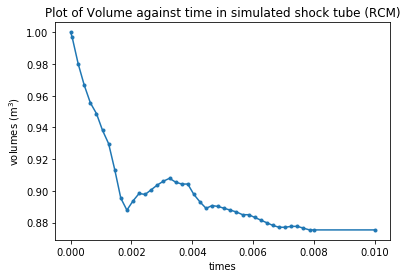

In [13]:
plt.plot(times, volumes, '.-')
plt.xlabel('times')
plt.ylabel('volumes (m$^3$)')
plt.title('Plot of Volume against time in simulated shock tube (RCM)')

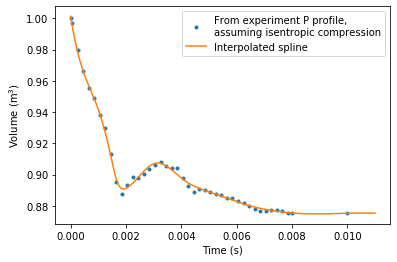

In [14]:
import scipy.interpolate
spl = scipy.interpolate.UnivariateSpline(times, volumes, k=3,s=0.0001, ext='const')
# if ext='const', extrapolation return the boundary value.

plt.plot(times, volumes, '.', label="From experiment P profile,\nassuming isentropic compression")
t = np.linspace(0,max(times)*1.1,1000)
plt.plot(t, spl(t), label="Interpolated spline")
plt.xlabel('Time (s)')
plt.ylabel('Volume (m$^3$)')
plt.legend(loc='best')

In [15]:
spl([0.01, 0.02, 0.03])

array([0.87535545, 0.87535545, 0.87535545])

In [16]:
velocity = spl.derivative(n=1)
print(velocity.ext)
velocity.ext=1 # zeros
print(velocity.ext)

3
1


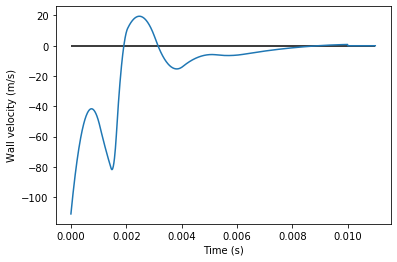

In [17]:
plt.plot(t, velocity(t))
plt.xlabel('Time (s)')
plt.ylabel('Wall velocity (m/s)')
plt.hlines(0,0,max(t))

Text(0.5, 1.0, 'Extrapolated to 0.1 s')

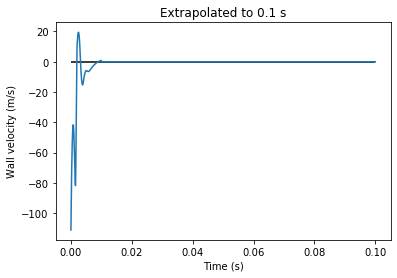

In [18]:
plt.plot(np.append(t,0.1), velocity(np.append(t,0.1)))
plt.xlabel('Time (s)')
plt.ylabel('Wall velocity (m/s)')
plt.hlines(0,0,0.1)
plt.title("Extrapolated to 0.1 s")

In [19]:
velocity(0.1)

array(0.)

In [20]:
def get_ignition_delay(gas, temperature, pressure_bar, mole_fractions, plot=False):
    """
    A general function to find the igniton delay.
    Using C2H + O --> CH* as the indication of ignition
    
    gas is a cantera Solution object
    temperature in K
    pressure_bar is in bar
    mole_fractions is a dict
    """
    gas.TPX = temperature, pressure_bar*1e5, mole_fractions

    
    reactor = ct.IdealGasReactor(gas)
    environment = ct.Reservoir(ct.Solution('air.xml'))
    
    ct.Wall(reactor, environment, A=1.0, velocity=velocity)
    reactor_network = ct.ReactorNet([reactor])
    
    time = 0.0
    end_time = 100e-3
    
    times = []
    concentrations = []
    pressures = []
    temperatures = []
    volumes = []
    
    print_data = True
    while time < end_time:
        time = reactor_network.time
        times.append(time)
        temperatures.append(reactor.T)
        pressures.append(reactor.thermo.P)
        concentrations.append(reactor.thermo.concentrations)
        volumes.append(reactor.volume)
        # take a timestep
        # the size of the step will be determined by the ODE solver
        # depending on how quickly things are changing.
        reactor_network.step()
    
    print("Reached end time {0:.2f} ms in {1} steps".format(times[-1]*1e3, len(times)))
    # convert the lists into arrays
    concentrations = np.array(concentrations)
    times = np.array(times)
    pressures = np.array(pressures)
    temperatures = np.array(temperatures)
    volumes = np.array(volumes)

    
    if plot:
        plt.plot(times*1e3, volumes)
        plt.xlabel("Time (ms)")
        plt.ylabel("Volumes m$^3$")
        plt.tight_layout()
        plt.show()
        
        
    if plot:
        plt.subplot(2,1,1)
        plt.plot(times*1e3, pressures/1e5)
        plt.ylabel("Pressure (bar)", color='b')
        ax2 = plt.gca().twinx()
        ax2.set_ylabel('Temperature (K)', color='r')
        ax2.plot(times*1e3, temperatures, 'r')
    # Using C2H + O --> CH* as the indication of ignition
    i_c2h = gas.species_index('C2H(4)')   
    i_o = gas.species_index('O(5)')
    excited_ch_generation = concentrations[:,i_o] * concentrations[:,i_c2h]
    if plot:
        plt.subplot(2,1,2)
        plt.plot(times*1e3, excited_ch_generation, 'g')
        plt.ylabel("CH* emission")
        plt.ylim(0,max(1e-13,1.1*max(excited_ch_generation)))
        plt.xlabel("Time (ms)")
        plt.tight_layout()
        plt.show()
    step_with_highest_ch_gen = excited_ch_generation.argmax()
    if step_with_highest_ch_gen > 1 and excited_ch_generation.max()>1e-20:
        ignition_time_ms = 1e3 * times[step_with_highest_ch_gen]
        print("At {0} K {1} bar, ignition delay time is {2} ms".format(temperature, pressure_bar, ignition_time_ms))
        return ignition_time_ms
    else:
        print("At {0} K {1} bar, no ignition detected".format(temperature, pressure_bar))
        return np.infty

In [21]:
def get_ignition_delay_air_n2(temperature, pressure_bar=16, phi=1.0, plot=False):
    """
    For figure 14
    
    temperature in K
    pressure in bar
    phi is equivalence ratio
    burns DME in air
    """
    gas.TP = temperature, pressure_bar*1e5
    set_gas_concentrations(gas,phi)
    mole_fractions = gas.X
    if plot:
        gas()

    time = get_ignition_delay(gas, temperature, pressure_bar, mole_fractions, plot=plot)
    return time
gas()


  gas:

       temperature          939.06  K
          pressure      1.9072e+06  Pa
           density         7.01726  kg/m^3
  mean mol. weight         28.7276  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      6.7541e+05         1.94e+07     J
   internal energy      4.0362e+05         1.16e+07     J
           entropy          7234.3        2.078e+05     J/K
    Gibbs function      -6.118e+06       -1.758e+08     J
 heat capacity c_p          1201.4        3.451e+04     J/K
 heat capacity c_v          912.01         2.62e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                N2       0.929134         0.906038         -21.8305
         iC8H18(1)     0.00524934        0.0208732         -97.0525
             O2(2)      0.0656168        0.0730886         -26.1717
     [ +485 minor]          


  gas:

       temperature            1250  K
          pressure     4.19886e+06  Pa
           density         11.6061  kg/m^3
  mean mol. weight         28.7276  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy        1.06e+06        3.045e+07     J
   internal energy      6.9821e+05        2.006e+07     J
           entropy          7359.1        2.114e+05     J/K
    Gibbs function     -8.1389e+06       -2.338e+08     J
 heat capacity c_p          1268.4        3.644e+04     J/K
 heat capacity c_v          978.99        2.812e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                N2       0.929134         0.906038         -21.8099
         iC8H18(1)     0.00524934        0.0208732         -97.8474
             O2(2)      0.0656168        0.0730886         -26.1965
     [ +485 minor]          

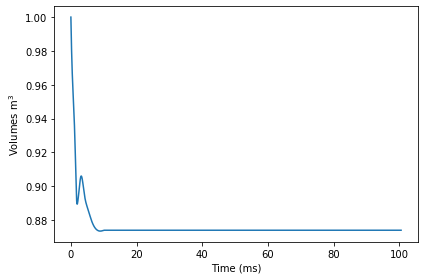

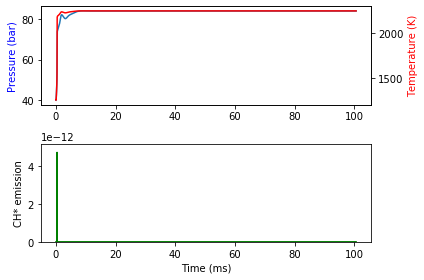

At 1250.0 K 40 bar, ignition delay time is 0.37026531146443525 ms


In [22]:
get_ignition_delay_air_n2(1000/.8, 40, 1, plot=True)
plt.rcParams['figure.figsize'] = [10, 8]

Reached end time 103.11 ms in 4125 steps
At 1428.5714285714287 K 16 bar, ignition delay time is 0.17006545009963958 ms
Reached end time 102.20 ms in 4741 steps
At 1308.4112149532712 K 16 bar, ignition delay time is 0.4895135319865201 ms
Reached end time 103.42 ms in 4661 steps
At 1206.896551724138 K 16 bar, ignition delay time is 1.159581960080688 ms
Reached end time 106.34 ms in 4680 steps
At 1120.0 K 16 bar, ignition delay time is 2.5259327918868744 ms
Reached end time 101.34 ms in 4894 steps
At 1044.7761194029852 K 16 bar, ignition delay time is 6.180731202366194 ms
Reached end time 102.86 ms in 5038 steps
At 979.0209790209791 K 16 bar, ignition delay time is 15.57631577232878 ms
Reached end time 100.10 ms in 5093 steps
At 921.0526315789473 K 16 bar, ignition delay time is 37.139191000422166 ms
Reached end time 100.96 ms in 4915 steps
At 869.5652173913044 K 16 bar, ignition delay time is 73.77698212590576 ms
Reached end time 100.05 ms in 878 steps
At 823.5294117647057 K 16 bar, no i

<function matplotlib.pyplot.show(*args, **kw)>

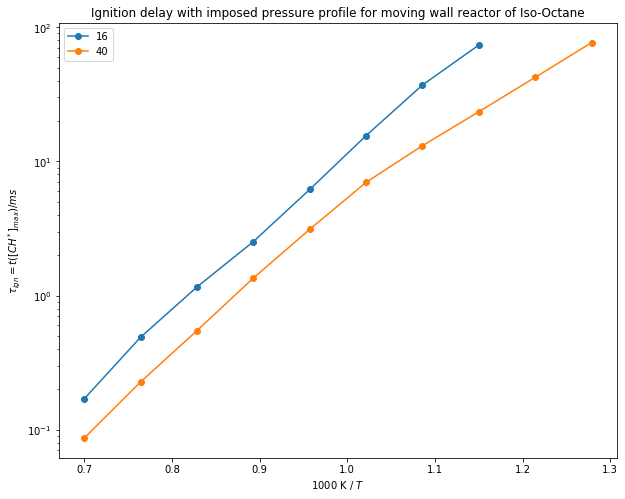

In [24]:
RMG_temperatures = 1000/np.linspace(0.70,1.6,15)
pressures_bar = [16, 40]
phi = 1

RMG_results = dict()
times = []

for P in pressures_bar:
    ignition_delay_times = np.zeros_like(RMG_temperatures)
    for i,T in enumerate(RMG_temperatures):
        ignition_delay_times[i] = get_ignition_delay_air_n2(T,P, phi, plot=False)
    
    RMG_results[P] = ignition_delay_times
    plt.semilogy(1000/RMG_temperatures, ignition_delay_times, 'o-', label='{0}'.format(P))
plt.legend(loc='best')
plt.title('Ignition delay with imposed pressure profile for moving wall reactor of Iso-Octane')
plt.xlabel('1000 K / $T$')
plt.ylabel('$\\tau_{ign} = t([CH^*]_{max})/ms$')
plt.rcParams['figure.figsize'] = [10, 8]
plt.show

In [33]:
# kr = gas.reverse_rate_constants
# for i, k in enumerate(kr):
#     if k > 1e20:
#         print(f'{i:4d} {k:.4e} {gas.reaction_equation(i)}')
# print(f'{i:4d} {k:.4e} {gas.reaction_equation(i)}')

9180 1.0922e-10 OCHO(67) + S(1244) <=> C4H7O(289) + CO2(7)


In [34]:
for i in range(gas.n_reactions):
    if kr[i] > 1e20:
        print('{:4d}  {:.3e}  {}'.format(i, kr[i], gas.reaction_equation(i)))
print('{:4d}  {:.4e}  {}'.format(i, kr[i], gas.reaction_equation(i)))

9180  1.0922e-10  OCHO(67) + S(1244) <=> C4H7O(289) + CO2(7)


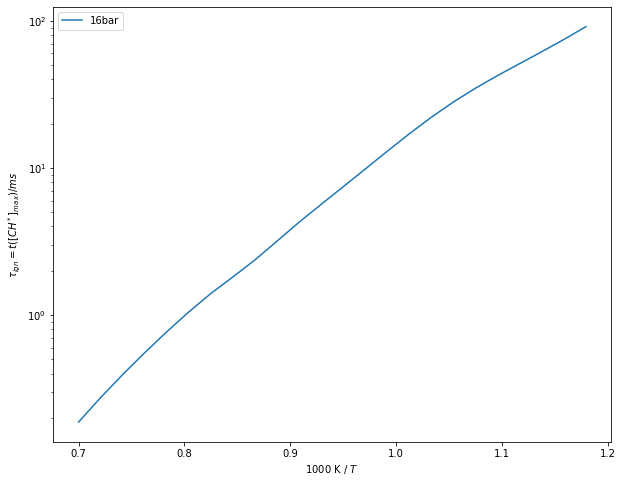

In [26]:
plt.semilogy(1000/RMG_temperatures,RMG_results[pressures_bar],label='{}bar'.format(pressures_bar))
plt.legend(loc='best')
plt.xlabel('1000 K / $T$')
plt.ylabel('$\\tau_{ign} = t([CH^*]_{max})/ms$')
plt.rcParams['figure.figsize'] = [10, 8]

In [ ]:
import pickle
with open('ic8-RMG_moving_wall.pkl','wb') as fp:
    pickle.dump((RMG_temperatures, times), fp)

In [27]:
import pickle
with open('ic8-LLNL.pkl','rb') as fp:
    (LLNL_temperatures, LLNL_results) = pickle.load(fp)

In [28]:
# extracted values of predicted ignition delay for iso-octane in Fig.14 
# using the docstrings
predict_ic8 = """0.657614                 0.0438935
0.660053                 0.0508193
0.668666                 0.0605986
0.674810                 0.0712038
0.682193                 0.0824521
0.690803                 0.0997690
0.695710                 0.117224
0.705556                 0.141850
0.712933                 0.169140
0.722793                 0.193028
0.730166                 0.233559
0.740019                 0.274467
0.748628                 0.332111
0.759721                 0.384622
0.765868                 0.445364
0.775710                 0.546873
0.786810                 0.615061
0.799138                 0.712339
0.806515                 0.849383
0.818843                 0.983721
0.829936                 1.13926
0.843501                 1.31950
0.852120                 1.52800
0.864449                 1.76967
0.878014                 2.04964
0.889110                 2.33921
0.900212                 2.59264
0.910061                 3.09168
0.927338                 3.52918
0.935965                 3.96890
0.942116                 4.52889
0.958153                 5.24581
0.969245                 6.07524
0.985293                 6.73451
0.993909                 7.91373
1.00872                  8.90155
1.02476                  9.86753
1.03338                  11.4268
1.04572                  12.8521
1.06423                  14.6714
1.07409                  16.9904
1.08520                  18.5574
1.10124                  21.1825
1.11357                  23.4784
1.12466                  27.5917
1.13824                  30.1389
1.14933                  35.4191
1.16290                  39.8386
1.17523                  46.1394
1.18633                  51.8925
1.19865                  61.8858
1.20728                  68.5850
1.21961                  80.6040
1.23070                  94.7255
"""

ign_times = []
temps = []

for k in predict_ic8.splitlines():
    temp, ign_time = k.split()
    temps.append(float(temp))
    ign_times.append(float(ign_time))
    
ign_times = np.array(ign_times)
temps = np.array(temps)
#print(temps, ign_times)

Text(0.5, 1.0, "Dagaut's Figure 14, iso-octane")

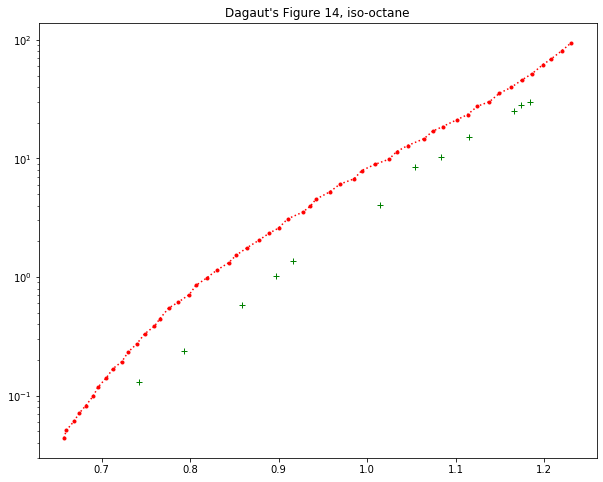

In [29]:
experiment_ic8 = """ 0.742197            0.129438
0.792731            0.238540
0.858775            0.582623
0.897119            1.02386
0.916046            1.35725
1.01424             4.07608
1.05446             8.48794
1.08368             10.3738
1.11478             15.2007
1.16585             24.9217
1.17410             28.0282
1.18433             30.0848
"""

exp_ign_times = []
exp_temps = []



for z in experiment_ic8.splitlines():
    exp_temp, exp_ign_time = z.split()
    exp_temps.append(float(exp_temp))
    exp_ign_times.append(float(exp_ign_time))
    
exp_ign_times = np.array(exp_ign_times)
exp_temps = np.array(exp_temps)

plt.semilogy(temps,ign_times, 'r.:')
plt.semilogy(exp_temps,exp_ign_times, 'g+')
plt.title("Dagaut's Figure 14, iso-octane")

In [ ]:
# import pickle 
# with open('ic8-RMG_no_moving_wall.pkl','rb') as fp:
#     (RMG_temperatures, RMG_results[pressures_bar]) = pickle.load(fp)
    

In [30]:
with open('ic8_DAG_moving_wall.pkl','rb') as fp:
    (DAG_temperatures,DAG_results) = pickle.load(fp)

<function matplotlib.pyplot.show(*args, **kw)>

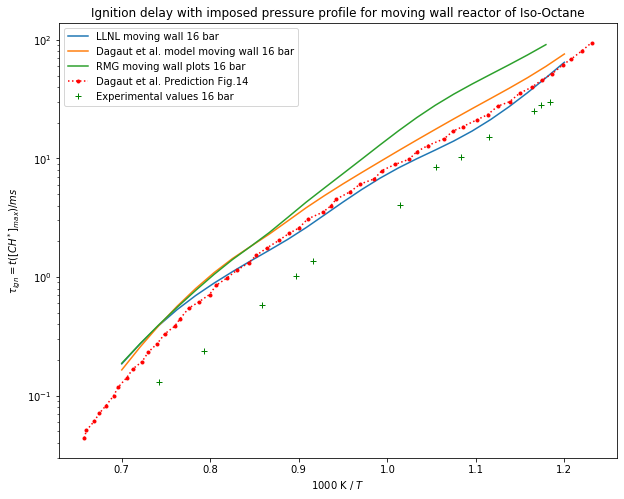

In [35]:
plt.semilogy(1000/LLNL_temperatures,LLNL_results[pressures_bar],label='LLNL moving wall {} bar'.format(pressures_bar))
#plt.semilogy(1000/RMG_temperatures,RMG_results[pressures_bar],label='RMG plots no moving wall {}bar'.format(pressures_bar))


plt.semilogy(1000/DAG_temperatures, DAG_results[pressures_bar], label='Dagaut et al. model moving wall {} bar'.format(pressures_bar))

plt.semilogy(1000/RMG_temperatures,RMG_results[pressures_bar],label='RMG moving wall plots {} bar'.format(pressures_bar))

plt.semilogy(temps,ign_times, 'r.:', label='Dagaut et al. Prediction Fig.14'.format(pressures_bar))

plt.semilogy(exp_temps,exp_ign_times, 'g+',label='Experimental values {} bar'.format(pressures_bar))
plt.title('Ignition delay with imposed pressure profile for moving wall reactor of Iso-Octane')
plt.legend(loc='best')
plt.xlabel('1000 K / $T$')
plt.ylabel('$\\tau_{ign} = t([CH^*]_{max})/ms$')
plt.rcParams['figure.figsize'] = [10, 8]
plt.show